In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_moons
from pycaret.classification import setup, compare_models, tune_model, evaluate_model, create_model

%matplotlib inline
%config InlineBackend.figure_format='retina'

## Генерируем данные

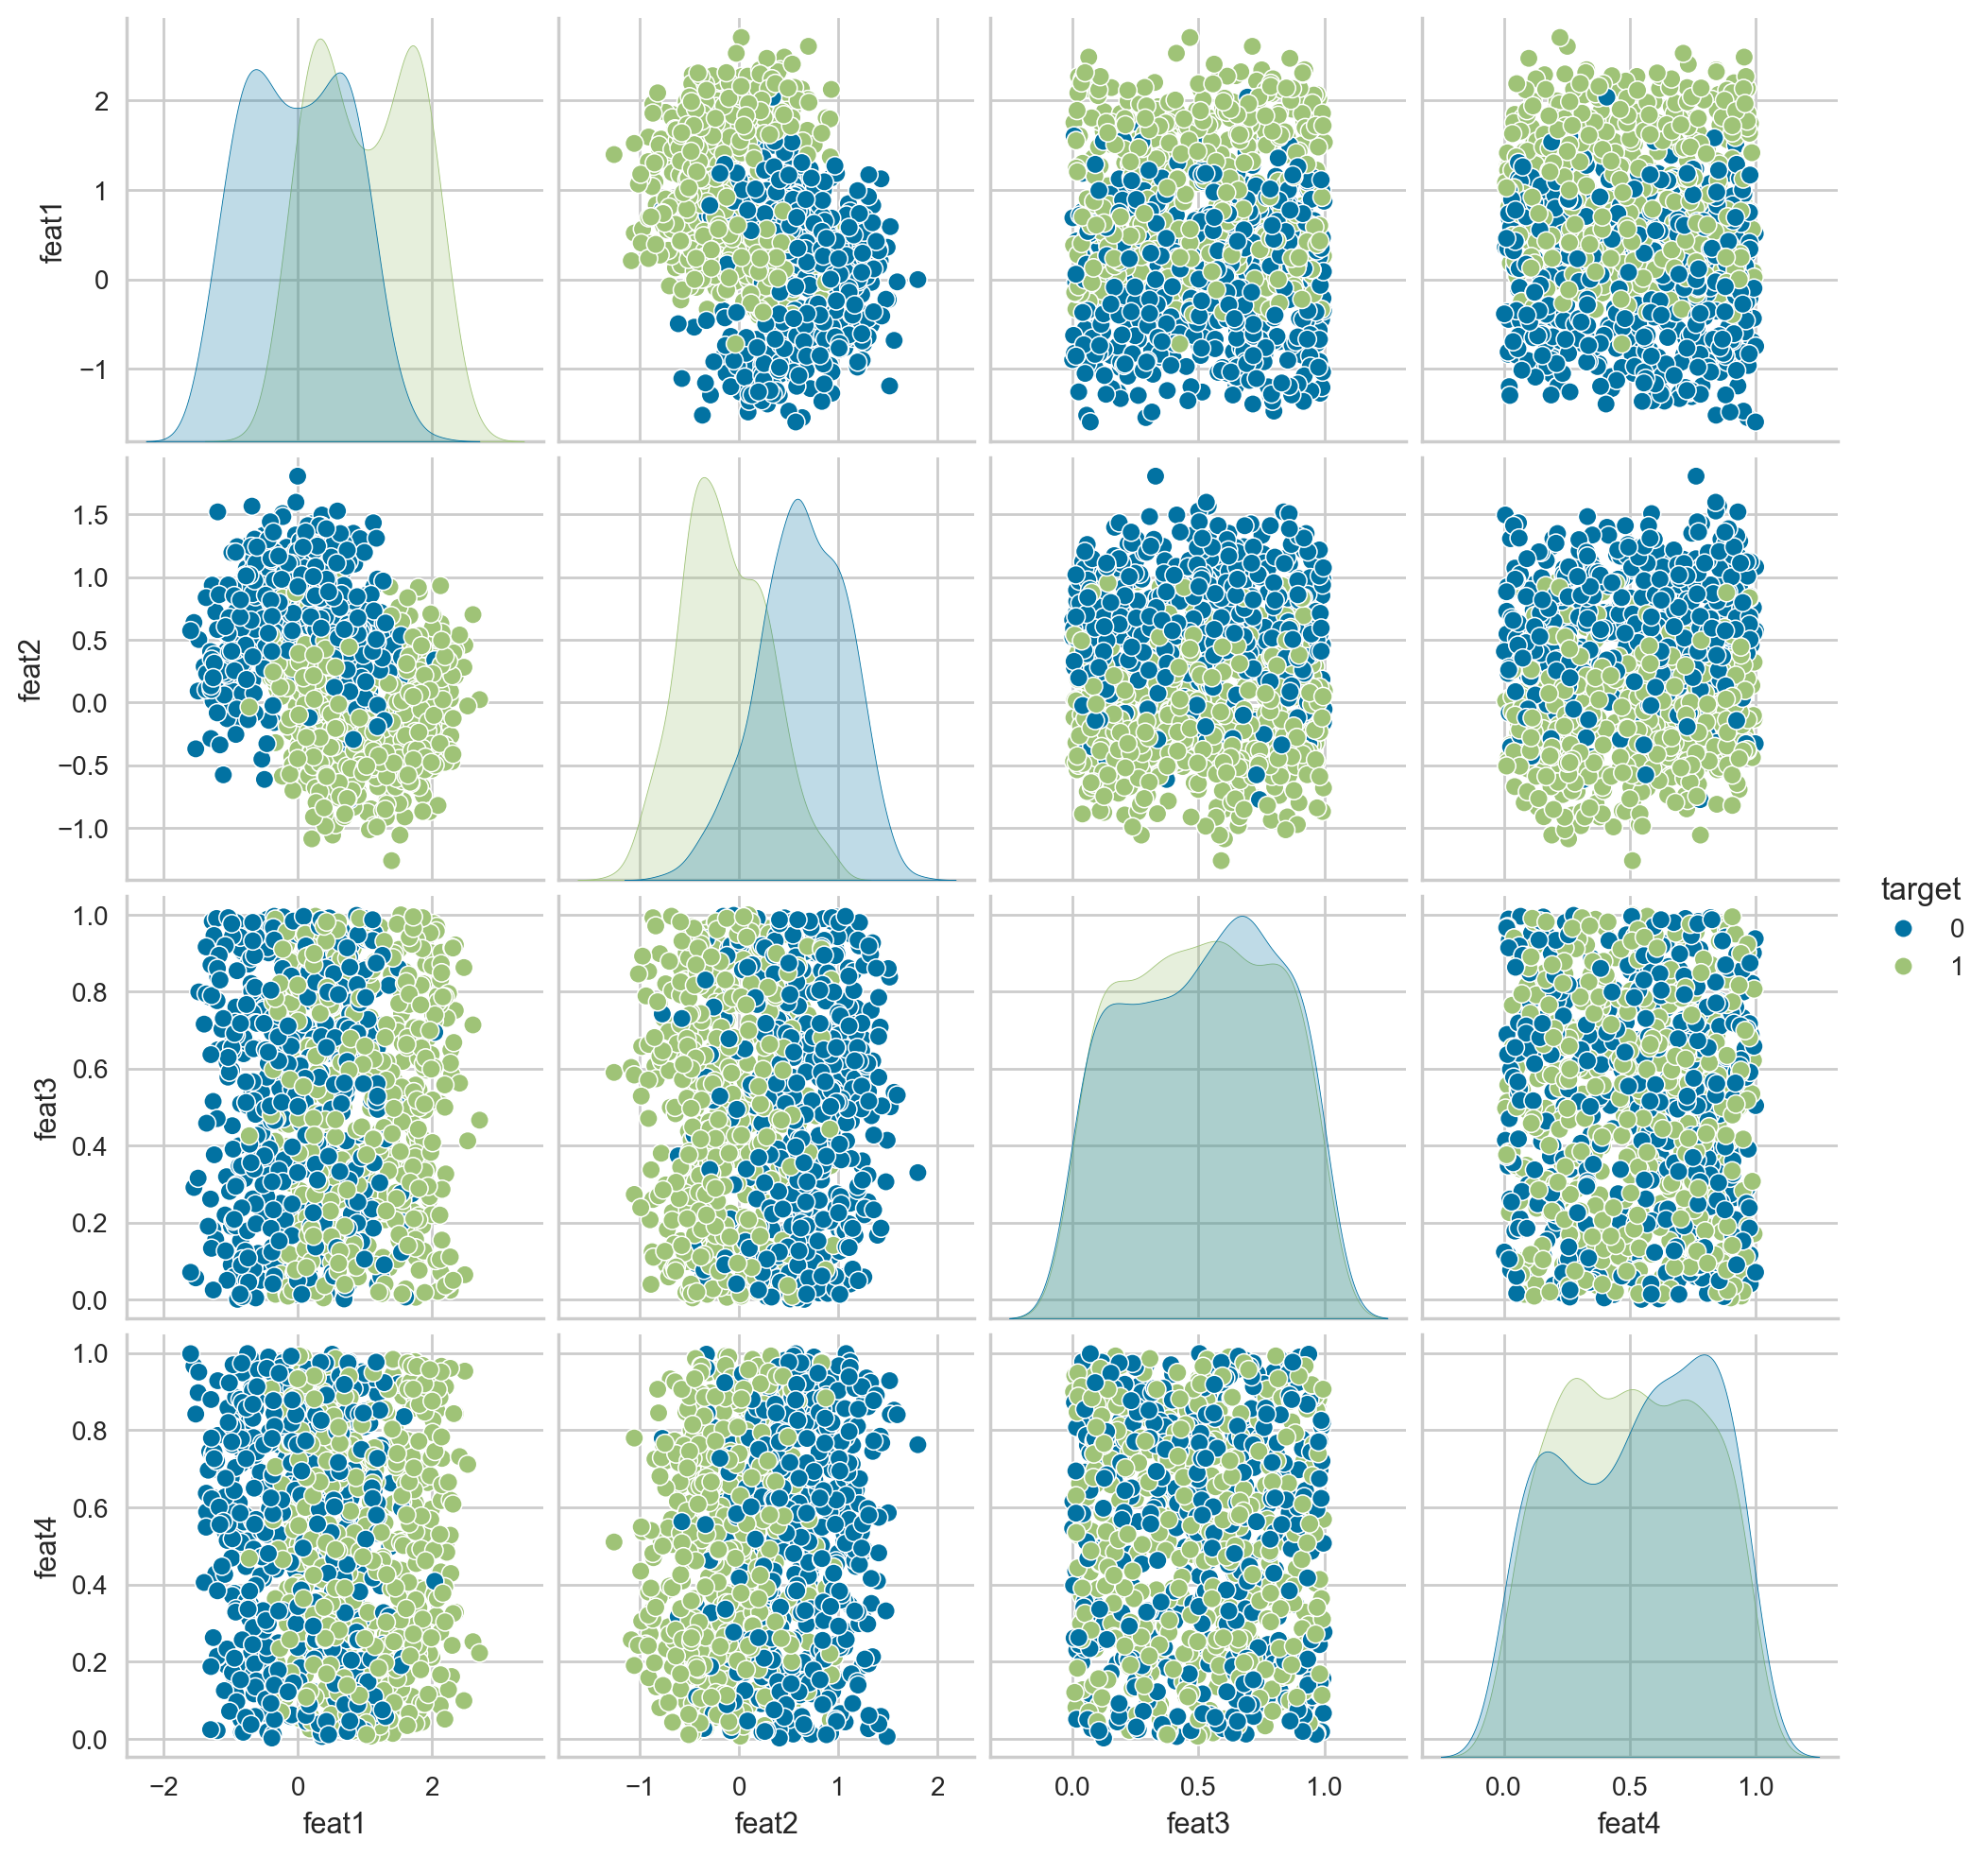

In [2]:
X, y = make_moons(n_samples=1_000, random_state=0, noise=0.3)

df = pd.DataFrame({
    'feat1': X[:, 0],
    'feat2': X[:, 1],
    'feat3': np.random.rand(X.shape[0]),
    'feat4': np.random.rand(X.shape[0]),
    'target': y
})

sns.pairplot(df, hue='target')

In [3]:
df.head()

,feat1,feat2,feat3,feat4,target
0,2.129573,0.629904,0.355006,0.966837,1
1,1.888882,0.146257,0.745822,0.010613,1
2,-0.190357,0.383993,0.325514,0.199577,0
3,-0.404416,0.195282,0.394454,0.633929,1
4,0.373012,-0.429716,0.467687,0.666635,1


## Инициализация PyCaret

In [3]:
s = setup(data=df, target='target', log_experiment=True)

,Description,Value
0,Session id,7083
1,Target,target
2,Target type,Binary
3,Original data shape,"(1000, 5)"
4,Transformed data shape,"(1000, 5)"
5,Transformed train set shape,"(700, 5)"
6,Transformed test set shape,"(300, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


2025/07/02 21:09:14 INFO mlflow.tracking.fluent: Experiment with name 'clf-default-name' does not exist. Creating a new experiment.


## Сравнение доступных алгоритмов

In [4]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9114,0.9495,0.9314,0.8970,0.9132,0.8229,0.8249,0.0120
lightgbm,Light Gradient Boosting Machine,0.9043,0.9549,0.9057,0.9042,0.9045,0.8086,0.8094,0.2010
rf,Random Forest Classifier,0.9014,0.9499,0.9114,0.8956,0.9026,0.8029,0.8047,0.0350
gbc,Gradient Boosting Classifier,0.9014,0.9547,0.9057,0.8996,0.9020,0.8029,0.8040,0.0250
et,Extra Trees Classifier,0.9000,0.9544,0.9086,0.8950,0.9010,0.8000,0.8014,0.0280
ada,Ada Boost Classifier,0.8900,0.9547,0.8971,0.8853,0.8907,0.7800,0.7809,0.0160
dt,Decision Tree Classifier,0.8643,0.8643,0.8657,0.8640,0.8642,0.7286,0.7296,0.0040
lr,Logistic Regression,0.8400,0.9248,0.8314,0.8480,0.8378,0.6800,0.6833,0.5000
ridge,Ridge Classifier,0.8386,0.9255,0.8314,0.8450,0.8366,0.6771,0.6799,0.0070
lda,Linear Discriminant Analysis,0.8386,0.9256,0.8314,0.8450,0.8366,0.6771,0.6799,0.0040


2025/07/02 21:09:47 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2025/07/02 21:09:47 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2025/07/02 21:09:47 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2025/07/02 21:09:47 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2025/07/02 21:09:47 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2025/07/02 21:09:47 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when

In [5]:
best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

## Подбор гиперпараметров

In [6]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9714,0.9841,0.9714,0.9714,0.9714,0.9429,0.9429
1,0.8857,0.9249,0.8571,0.9091,0.8824,0.7714,0.7727
2,0.8571,0.9073,0.8571,0.8571,0.8571,0.7143,0.7143
3,0.8857,0.9559,0.9143,0.8649,0.8889,0.7714,0.7727
4,0.9714,0.9955,0.9714,0.9714,0.9714,0.9429,0.9429
5,0.9286,0.9567,0.9714,0.8947,0.9315,0.8571,0.8603
6,0.9000,0.9522,0.9143,0.8889,0.9014,0.8000,0.8003
7,0.8714,0.9792,0.9429,0.8250,0.8800,0.7429,0.7506
8,0.9286,0.9624,0.9143,0.9412,0.9275,0.8571,0.8575


Fitting 10 folds for each of 10 candidates, totalling 100 fits


2025/07/02 21:11:00 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


## Анализ модели

In [7]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…